<a href="https://colab.research.google.com/github/luvbenz/2025-CV/blob/hw2/2-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Fig0310(b)(washed_out_pollen_image).tif to Fig0310(b)(washed_out_pollen_image) (1).tif


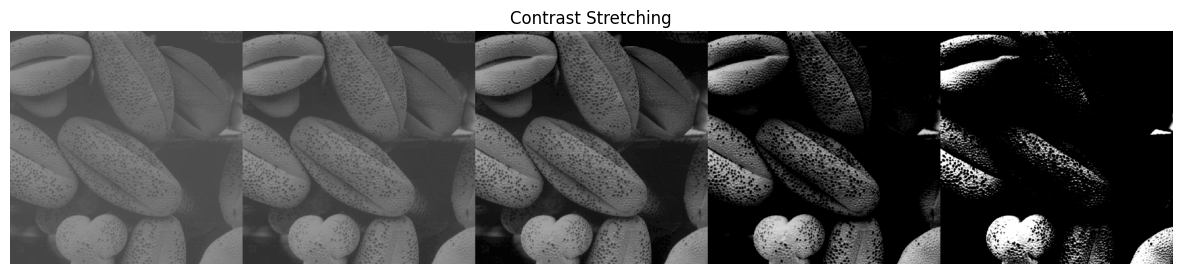

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# 파일 업로드 선택창 호출
uploaded = files.upload()

# 이미지 불러오기
img = cv.imread('Fig0310(b)(washed_out_pollen_image).tif')

# Contrast Stretching 함수 정의
def contrast_stretch(img, r1, s1, r2, s2):
    L = 256
    lut = np.zeros(256, dtype='uint8')
    for r in range(256):
        if r < r1:
            lut[r] = int(s1 / r1 * r)
        elif r1 <= r < r2:
            lut[r] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
        else:
            lut[r] = int(((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2)
    return cv.LUT(img, lut)

# contrast stretching 적용
cs1 = contrast_stretch(img, 50, 0, 200, 255)
cs2 = contrast_stretch(img, 70, 0, 180, 255)
cs3 = contrast_stretch(img, 90, 0, 160, 255)
cs4 = contrast_stretch(img, 110, 0, 140, 255)
cs5 = contrast_stretch(img, 120, 0, 130, 255)

# 결과를 수평으로 붙이기
gc = np.hstack((cs1, cs2, cs3, cs4, cs5))

# 출력
plt.figure(figsize=(15, 5))
plt.imshow(cv.cvtColor(gc, cv.COLOR_BGR2RGB))
plt.title('Contrast Stretching')
plt.axis('off')
plt.show()
